In [ ]:
import torch, matplotlib.pyplot as plt
from torchvision.datasets import MNIST
import torchvision.transforms as T
from torch.utils.data import DataLoader

In [ ]:
n = 10000
x = torch.randn(n, 28*28).cuda()
x = x.flatten(1)/x.norm(dim=1, keepdim=True)
dots = x @ x.T
dots = dots[torch.ones(n,n).triu(1).bool()]
dots = torch.rad2deg(torch.acos(dots))

In [ ]:
hist = torch.histogram(dots.cpu(), bins=1000, range=(75,120))

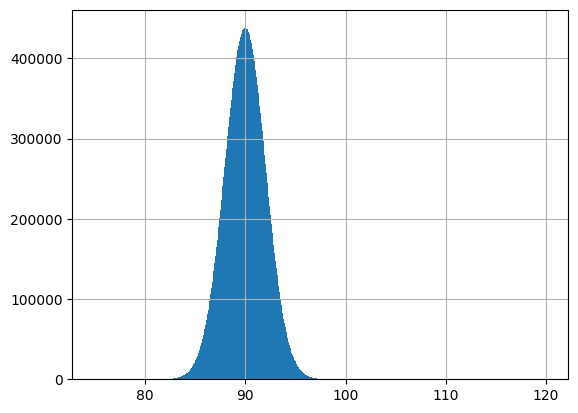

In [ ]:
plt.bar(hist.bin_edges[:-1], hist.hist, width=hist.bin_edges[1]-hist.bin_edges[0])
plt.grid()
plt.show()

In [ ]:
tfms = T.ToTensor()
ds = MNIST(root='../data', download=True, transform=tfms)

In [ ]:
xs = torch.stack([el[0][0] for el in ds])

In [ ]:
xs = (xs - xs.mean()) / xs.std()
xs = xs[torch.randperm(len(xs))[:20000]]

In [ ]:
xs = xs.flatten(1).cuda()
xs /= xs.norm(dim=1, keepdim=True)
dots = xs @ xs.T
dots = dots[torch.ones(*dots.shape).triu(1).bool()]
dots = torch.rad2deg(torch.acos(dots))

In [ ]:
hist = torch.histogram(dots.cpu(), bins=2000, range=(10,120))

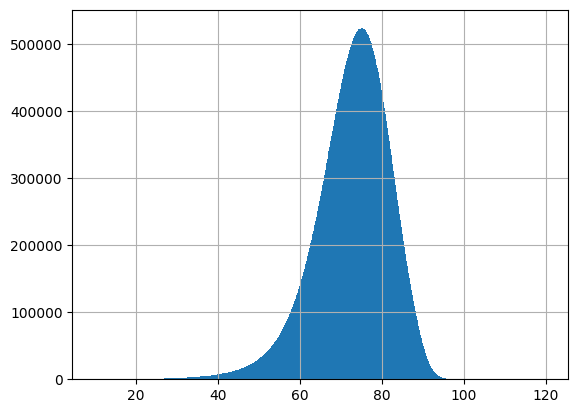

In [ ]:
plt.bar(hist.bin_edges[:-1], hist.hist, width=hist.bin_edges[1]-hist.bin_edges[0])
plt.grid()
plt.show()